# Eliminación de artefactos impulsivos en una imagen

**Daniel Proaño Guevara**


<img src="unir_logo.png" alt="logo_UNIR" width="400"/>

## 1. Adición de artefactos impulsivos
Crear una función que modele la adición, de forma aleatoria, de artefactos impulsivos. El resultado deberá apreciarse en la visualización de la imagen, que deberá estar afectada por ruido de tipo «sal y pimienta». Como se ha visto en la asignatura, estos artefactos toman valores de intensidad máximos o mínimos, y afectan, aleatoriamente, a los píxeles de la imagen. La función a implementar debe aceptar la imagen original y devolver la imagen afectada por el ruido. Además, sería deseable que aceptara un argumento adicional para indicar el porcentaje de píxeles que se verán afectados por estos artefactos

Importar las librerías necesarias para ejecutar el programa

In [1]:
from skimage import data
from skimage.color import rgb2gray
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

Importar la imagen y convertirla a escala de grises

In [2]:
#data.astronaut
astronaut = data.astronaut()
gray_astronaut = rgb2gray(astronaut)

Comprobar las dimensiones de las imágemes para poder procesarlas

In [3]:
print(astronaut.shape)
print(gray_astronaut.shape)

(512, 512, 3)
(512, 512)


Se crea una función de visualización de imágenes, eliminando los ejes de la gráfica

In [4]:
def imshow(img):
    fig, ax = plt.subplots(figsize=(7, 7))
    ax.imshow(img, cmap = plt.cm.gray)
    ax.set_xticks([]), ax.set_yticks([])
    plt.show()

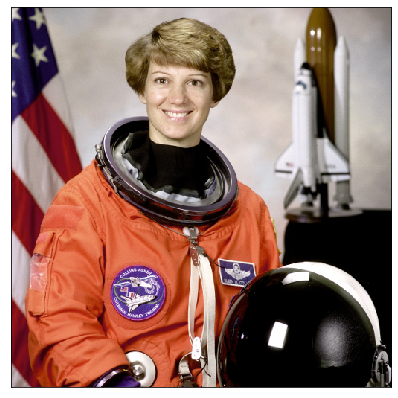

In [5]:
imshow(astronaut)

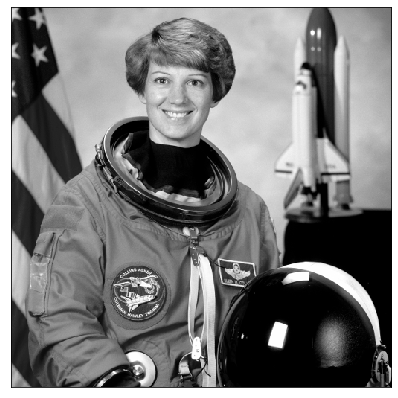

In [6]:
imshow(gray_astronaut)

Creación de la función de ruido sal y pimienta, crea un umbral de valores en grises sobre los cuales se va a aplicar el máximo o mínimo de los valores posibles para los pixeles

In [7]:
#Crear ruido sal y pimienta
def sp_noise(image, prec):
    #Añadir ruido sal y pimienta a una imagen
    #Prec: porcentaje de ruido en la imagen
    prob = prec / 100
    output = np.zeros(image.shape, np.uint8)
    rnd = np.random.rand(image.shape[0], image.shape[1])
    output = image.copy()
    output[rnd < prob] = 0
    output[rnd > 1 - prob] = 1
    return output

Aplica el ruido a la imagen

In [10]:
noise_astronaut = sp_noise(gray_astronaut, 1.5)

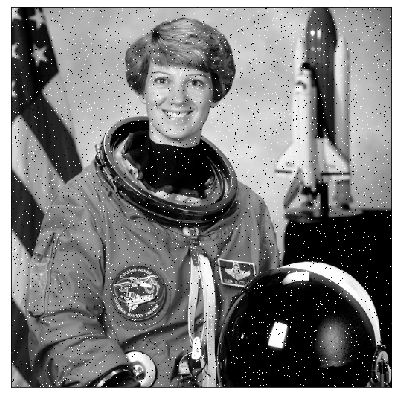

In [11]:
imshow(noise_astronaut)

## 2. Filtro de medianas
A partir de la imagen ruidosa, buscaremos eliminar los artefactos impulsivos para el posterior tratamiento de la imagen. Para ello, se deberá aplicar un filtro adecuado para este tipo de ruido

Filtro de medianas, recorre la imagen con un kernel de tamaño k, almacena todos los valores de la ventana en un vector, los ordena y obtiene la mediana de estos, ejecuta un try-except para kernel mayores a 3, donde agrega ceros a las fronteras donde no se puede analizar el algoritmo

In [12]:
#Filtro de medianas
#Implementación del pseudocódigo disponible en wikipedia
def filtro_mediana(img, k):
    import math
    output = np.zeros(img.shape)
    edge_x = math.floor(k/2)
    edge_y = edge_x
    
    kernel = np.zeros(k*k)
    
    for x in range(edge_x, img.shape[0]-1):
        for y in range(edge_y, img.shape[1]-1):
            i = 0
            for fx in range(0, k):
                for fy in range(0, k):
                    try:
                        kernel[i] = img[x + fx - edge_x, y + fy - edge_y]
                    except:
                        kernel[i] = 0
                    i = i + 1
            kernel = np.sort(kernel)
            output[x, y] = kernel[k]
            
    return output

Aplicación del filtro con un kernel de 3x3

In [13]:
filtered_astronaut = filtro_mediana(noise_astronaut, 3)

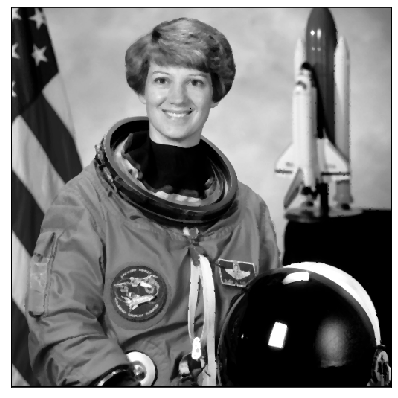

In [14]:
imshow(filtered_astronaut)

## 3. Detección de bordes
A partir de la imagen obtenida en la etapa anterior, se busca identificar las siluetas de las estructuras en ella presentes. Para este fin, se debe identificar y razonar qué tipo de operador corresponde aplicar

Según la literatura, se recomienda utilizar un operador laplaciano ya que detecta los cambios en las fronteras de la imagen, para esto se aplican dos nucleos convolucionales que afectarán a los bordes verticales y luego horizontales en la imagen, para obtener una detección completa, se obtiene el módulo de ambos.

In [15]:
#Filtro Sobel
def operador_sobel(img):
    A=np.array([[1],[2],[1]])
    B=np.array([[-1], [0], [1]])
    #Núcleos de convolución
    Gx = signal.convolve(A * (B.T), img)
    Gy = signal.convolve(B * (A.T), img)
    #Módulo de convoluciones
    G = np.sqrt(np.square(Gx) + np.square(Gy))
    return G

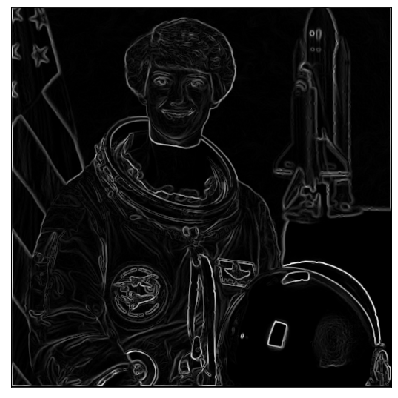

In [16]:
Sob = operador_sobel(filtered_astronaut)
imshow(Sob)

Otra forma para detectar bordes es a través de la resta de la imagen original menos la imagen filtrada, ya que el mismo filtro de medianas mueve ligeramente la imagen, en este caso se aplicó un filtro con un kernel de 5x5 para que se aprecie mejor la diferencia entre la imagen original y la procesada

In [17]:
filtered_astronaut = filtro_mediana(noise_astronaut, 5)

In [18]:
bordes = gray_astronaut - filtered_astronaut

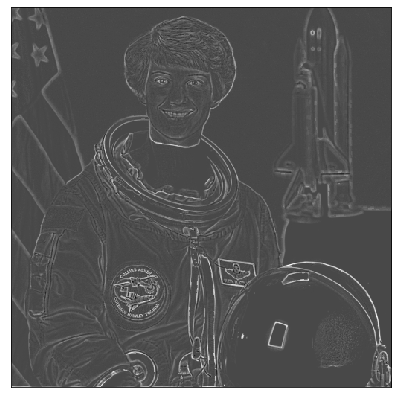

In [19]:
imshow(bordes)